## Analysing Fuel Voltage Signal Data

In [42]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import statsmodels.api as sm

%matplotlib inline

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Loading data in Pandas Dataframe

In [396]:
df = pd.read_excel("Problem statement.xlsx")
df2 = pd.read_excel("Problem statement.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33070 entries, 0 to 33069
Data columns (total 4 columns):
Timestamp              33070 non-null datetime64[ns]
Speed                  33070 non-null float64
Cumulative Distance    33070 non-null int64
Fuel Level (mV)        33070 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 MB


In [3]:
df.describe()

,Speed,Cumulative Distance,Fuel Level (mV)
count,33070.000000,3.307000e+04,33070.000000
mean,27.298125,2.192976e+06,613.757121
std,13.459000,1.018111e+06,69.923635
min,0.100000,0.000000e+00,0.000000
25%,17.400000,1.380314e+06,589.000000
50%,28.700000,2.189484e+06,614.000000
75%,37.500000,3.077728e+06,651.000000
max,65.000000,3.937774e+06,758.000000


In [4]:
df.head(10)

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV)
0,2018-01-21 17:14:05,0.1,0,651
1,2018-01-21 17:15:06,3.8,25,646
2,2018-01-21 17:15:20,5.5,41,641
3,2018-01-21 17:15:23,6.2,46,641
4,2018-01-21 17:15:39,15.7,88,641
5,2018-01-21 17:15:41,16.1,96,641
6,2018-01-21 17:16:11,26.1,280,628
7,2018-01-21 17:16:41,23.8,474,619
8,2018-01-21 17:17:11,23.8,682,621
9,2018-01-21 17:17:41,27.0,893,619


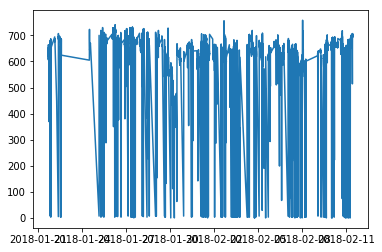

In [5]:
plt.plot(df.Timestamp, df['Fuel Level (mV)'])
plt.rcParams['figure.figsize'] = [16,4]

The above line plot donot give a clear picture, about where the maximum datapoints are located. The give a better picture, we will use Box plot  and scatter plot, that will help us in analysing where most of the data points are situated.

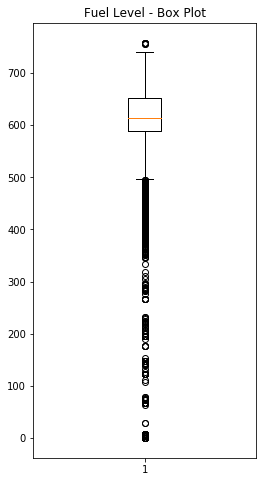

In [14]:
plt.boxplot(df['Fuel Level (mV)']);
plt.title('Fuel Level - Box Plot');
plt.rcParams['figure.figsize'] = [4,8];

Above box plot data shows that the majority of data points lie between the value 500 and 700. All points below value are outliers and can be contributed to noise. The scatter plot for the 'Fuel Voltage' confirms the same.

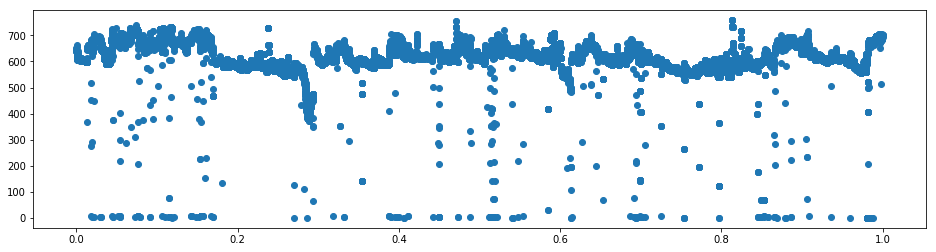

In [12]:
plt.scatter(np.linspace(0,1, len(df)), df['Fuel Level (mV)'] );
plt.rcParams['figure.figsize'] = [16,4]

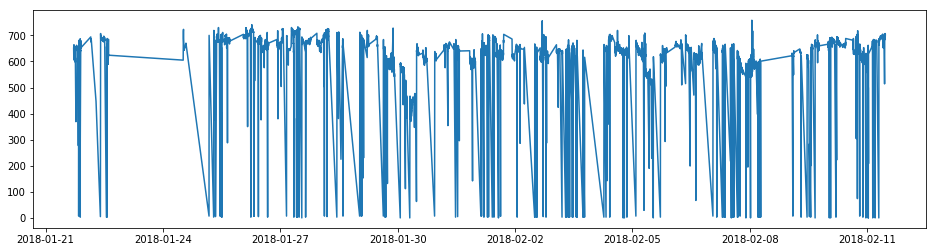

In [16]:
plt.plot(df.Timestamp, df['Fuel Level (mV)'])
plt.rcParams['figure.figsize'] = [16,4]

### Analysis Conclusion
The above plots, representing 'Fuel Voltage Signal' has inherent noise in it. This can be removed by using following method :
##### 1. Low Pass Butterworth filter. 
We can remove incorrect data by treating them as nose, and passing the time-bound signal through a low pass filter. But before that, it is important to analysis the Spectral plot of the voltage signal, in order to know the range and magnitude of noise frequency.

##### 2. Regression Algorithm
We can apply linear, quadratic or higher order regression algorithms, to obtain closest fit Curve for the voltage data.


### Spectral Analysis - Plotting FFT


FFT will help in understanding the different frequency components available in the voltage signal in the form of noise.

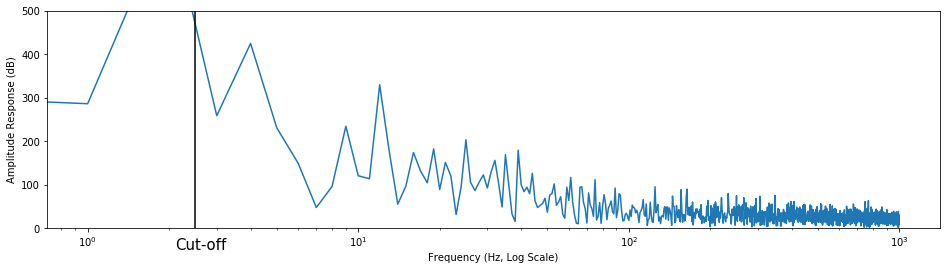

In [17]:
norm_data = df['Fuel Level (mV)']/df['Fuel Level (mV)'].max()
yvolt = fft(norm_data)
plt.ylim(0,500);
plt.plot(np.abs(yvolt[:1000]));
plt.rcParams['figure.figsize'] = [16,4]
plt.xscale('log')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (Hz, Log Scale)')
plt.axvline(2.5, color = 'black')
plt.text(2.1,-50, "Cut-off", fontsize = 15);

Hence most dominant frequency magnitudes are between 1-3 Hz signal, i.e. almost a DC signal. Remaining all are noise in the system. All these noise can be removed using a  low-pass butterworth filter. Hence our cut-off frequency will be 2.5Hz

### SIgnal Filteration


This block defines the lowpass butterworth filter to be used for extracting true signal

In [18]:
def butter_lowpass_filter(data, cutoff, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y,y1



### Results

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


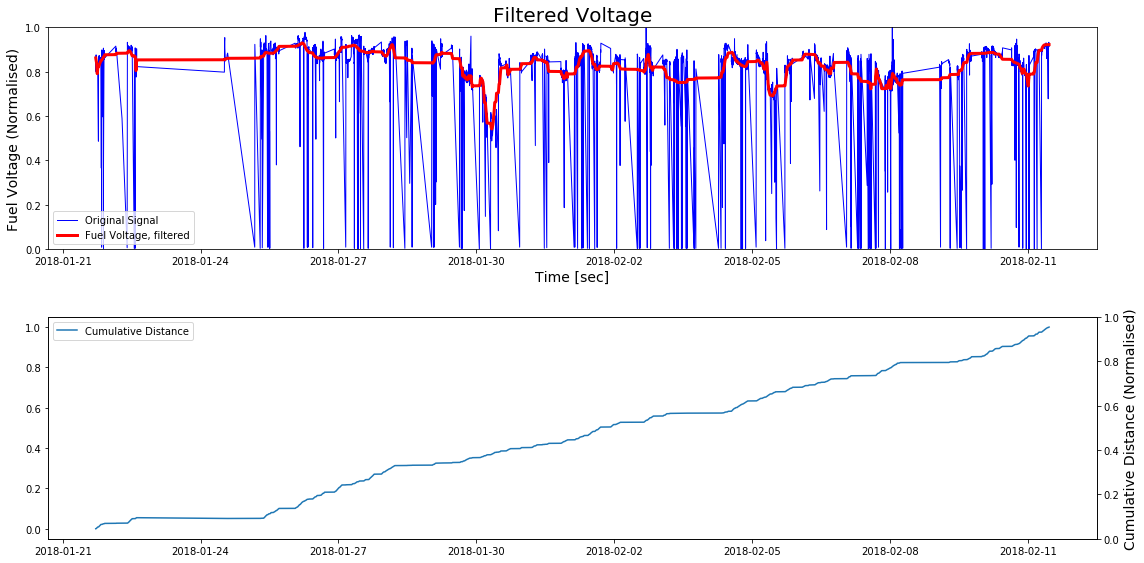

In [397]:
# Filter the data, and plot both the original and filtered signals.
fs = 4000             # Sampling Frequency
order = 5             # Order of Filter
cutoff = 8          # Filter Cut-off Frequency

# Calling Butterworth filter
y,y1 = butter_lowpass_filter(norm_data, cutoff, fs, order, ftype= False)

time = df['Timestamp']

#Plotting Results
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2, 1,1)
plt.plot(time, norm_data, 'b-', linewidth=1, label='Original Signal')

plt.legend()
plt.grid()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Original Fuel Voltage', fontsize = 20)

plt.subplot(2, 1,2)
plt.plot(time, df['Cumulative Distance']/df['Cumulative Distance'].max(), label='Cumulative Distance');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)

plt.subplot(2, 1,1)
plt.plot(df.Timestamp, y1, 'r-', linewidth=3, label='Fuel Voltage, filtered')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Filtered Voltage', fontsize = 20)
plt.xlabel('Time [sec]',  fontsize = 14)


plt.tight_layout()


#### Replacing wrong data with corrected value
The equivalent predicted values generated out of the low pass filter, can be used to replace the erreneous/noisy data by the better approximate from the filter data.


In [400]:
# Function to replace noise data using filtered approximate
df2 = df.copy()
def f(x):
    if x[4] > x[3] :
        return x[4]
    else:
        return x[3]

# Normalising fuel voltage data    
df2['Fuel Level (mV)'] = df2['Fuel Level (mV)']/df2['Fuel Level (mV)'].max()

df2['filter_dt'] = y1 
df2['correction'] = df2.apply(f, axis= 1)
df2.head()

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV),filter_dt,correction
0,2018-01-21 17:14:05,0.1,0,0.858839,0.862199,0.862199
1,2018-01-21 17:15:06,3.8,25,0.852243,0.861725,0.861725
2,2018-01-21 17:15:20,5.5,41,0.845646,0.861251,0.861251
3,2018-01-21 17:15:23,6.2,46,0.845646,0.860777,0.860777
4,2018-01-21 17:15:39,15.7,88,0.845646,0.860302,0.860302


In [401]:
# Coverting timestamp to seconds, starting from time = 0
df2['time_in_sec'] = df2.Timestamp.apply(lambda x : (x - df.Timestamp[0]).total_seconds())
df2.head()

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV),filter_dt,correction,time_in_sec
0,2018-01-21 17:14:05,0.1,0,0.858839,0.862199,0.862199,0.0
1,2018-01-21 17:15:06,3.8,25,0.852243,0.861725,0.861725,61.0
2,2018-01-21 17:15:20,5.5,41,0.845646,0.861251,0.861251,75.0
3,2018-01-21 17:15:23,6.2,46,0.845646,0.860777,0.860777,78.0
4,2018-01-21 17:15:39,15.7,88,0.845646,0.860302,0.860302,94.0


c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Voltage Data minus Noise')

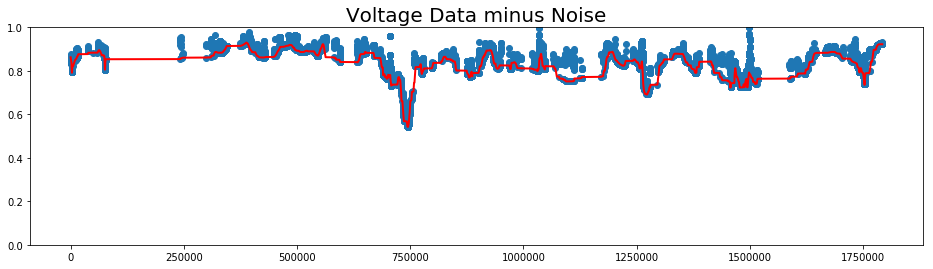

In [404]:
plt.rcParams['figure.figsize'] = [16,4]
plt.ylim(0,1)

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'])
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)


### 2nd level filtering
Still the data, donot looks better approximate. Hence, after replacing with the approximate data, the corrected data can be again passed through low pass filter to obtain better approximate of fuel voltage data

In [417]:
y,y2 = butter_lowpass_filter(df2['correction'], cutoff, fs, order, ftype= False)

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Voltage Data minus Noise')

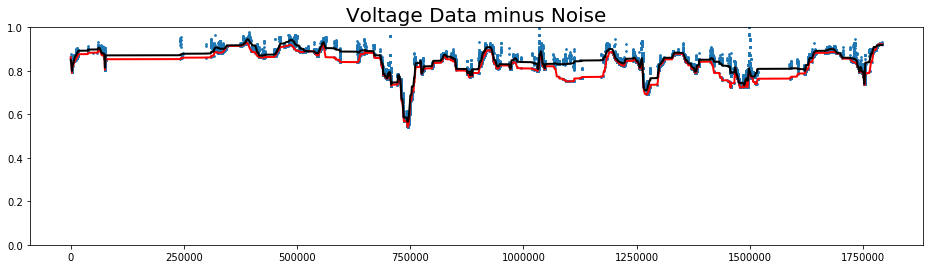

In [418]:
plt.subplot(1,1,1)
plt.ylim(0,1)
plt.scatter(df2.time_in_sec, df2['correction'], s= 3)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y2, 'black', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)

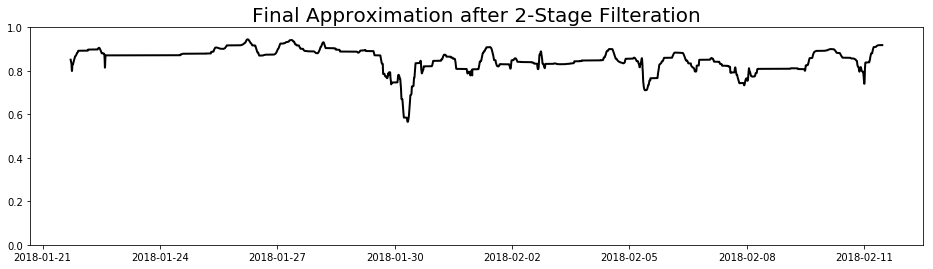

In [423]:
plt.ylim(0,1)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation after 2-Stage Filteration', fontsize = 20);

In [424]:
df2['filter_dt_L2'] = y2
df2.head()

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV),filter_dt,correction,time_in_sec,filter_dt_L2
0,2018-01-21 17:14:05,0.1,0,0.858839,0.862199,0.862199,0.0,0.851300
1,2018-01-21 17:15:06,3.8,25,0.852243,0.861725,0.861725,61.0,0.851039
2,2018-01-21 17:15:20,5.5,41,0.845646,0.861251,0.861251,75.0,0.850777
3,2018-01-21 17:15:23,6.2,46,0.845646,0.860777,0.860777,78.0,0.850514
4,2018-01-21 17:15:39,15.7,88,0.845646,0.860302,0.860302,94.0,0.850250


### Method 2 : Regression
This is implemted, but dividing the data into small windows of a finite size = sz. And then passing the data of that window to function, he perform linear or 2nd order regression to give approximate curve.

In [455]:
pd.set_option('display.width', 1000)

#######################################
### Defining Regression Function
#####################################
def regression_data(output_var , input_var):
    lm = sm.OLS(output_var, input_var)
    result = lm.fit()
    return result.params

# Linear Prediction
#########################
i = 0
sz =500   # Window Size
pred_dt = []
while (i<= len(df2)):
    dft = df2[i:i+sz].copy()
    dft['intercept'] = 1
    data = regression_data(dft['Fuel Level (mV)'], dft[['intercept','time_in_sec']])
    prediction = dft['time_in_sec']*data[1] + data[0]
    pred_dt.extend(prediction)
    i = i+sz
df2['Regress_1st'] = pred_dt

In [456]:
# 2nd order Prediction
################################
i = 0
#sz = 500  # Window Size
pred_dt = []
while (i<= len(df2)):
    dft = df2[i:i+sz].copy()
    dft['intercept'] = 1
    dft['time_sq'] = dft['time_in_sec'].apply(lambda x: x*x)
    
    data = regression_data(dft['Fuel Level (mV)'], dft[['intercept','time_in_sec','time_sq']])
    prediction = (dft['time_sq']*data[2] + dft['time_in_sec']*data[1] + 1*data[0])
    pred_dt.extend(prediction)
    i = i+sz
    
df2['Regress_2nd'] = pred_dt


c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


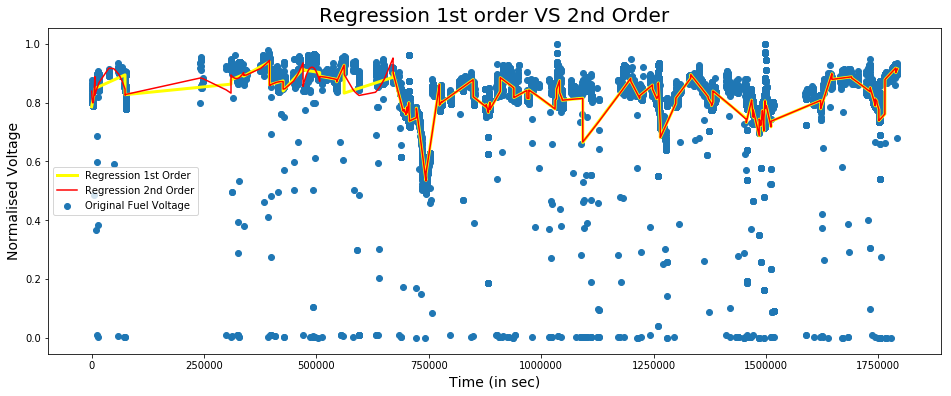

In [470]:
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.Regress_1st, 'yellow', linewidth = 3, label = 'Regression 1st Order')
plt.legend()

plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.Regress_2nd, '-r', label = 'Regression 2nd Order')
plt.legend()

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['Fuel Level (mV)'], label = 'Original Fuel Voltage')
plt.legend()

plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Regression 1st order VS 2nd Order', fontsize = 20);


In [439]:
df2.head()

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV),filter_dt,correction,time_in_sec,filter_dt_L2,predict_1st,predict_2nd
0,2018-01-21 17:14:05,0.1,0,0.858839,0.862199,0.862199,0.0,0.851300,0.813996,0.838733
1,2018-01-21 17:15:06,3.8,25,0.852243,0.861725,0.861725,61.0,0.851039,0.813996,0.837054
2,2018-01-21 17:15:20,5.5,41,0.845646,0.861251,0.861251,75.0,0.850777,0.813996,0.836674
3,2018-01-21 17:15:23,6.2,46,0.845646,0.860777,0.860777,78.0,0.850514,0.813996,0.836592
4,2018-01-21 17:15:39,15.7,88,0.845646,0.860302,0.860302,94.0,0.850250,0.813996,0.836161


### Final Conclusion
Finally we can compare the approximare curve obtained from both the methods

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


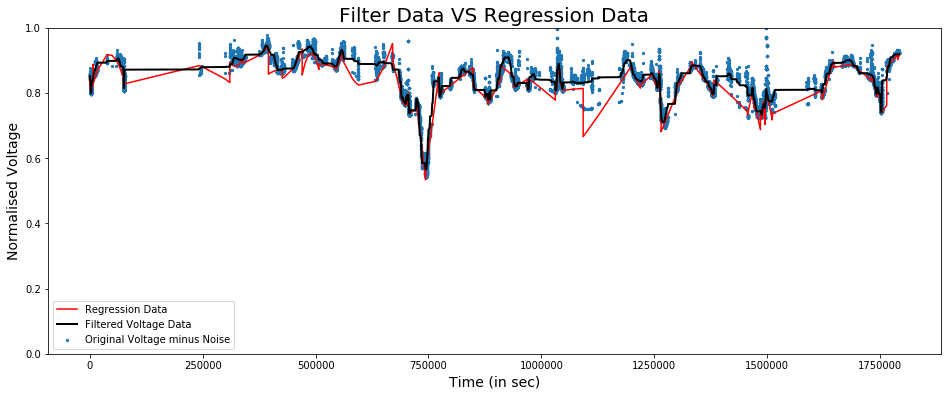

In [471]:
plt.rcParams['figure.figsize'] = [16,6]
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.predict_2nd, '-r', label = 'Regression Data')
plt.legend()

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'], s = 5, label = 'Original Voltage minus Noise')
plt.legend()

plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.filter_dt_L2, 'black', linewidth = 2, label = 'Filtered Voltage Data')
plt.legend()

plt.ylim(0,1)
plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Filter Data VS Regression Data', fontsize = 20);


##### Hence the filtered Data give the better representation of Fuel Voltage Data.

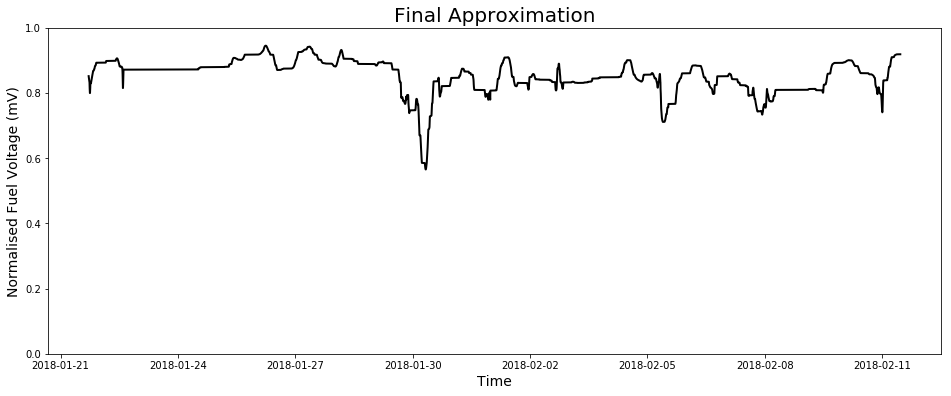

In [473]:
plt.ylim(0,1)
plt.rcParams['figure.figsize'] = [16,6]
plt.ylabel('Normalised Fuel Voltage (mV)', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation', fontsize = 20);